# Airline Customer Satisfaction Capstone

## Notebook 2: EDA (Exploratory Data Analysis) & Pre Processing
### BrainStation Data Science Bootcamp
#### By Ali Idris

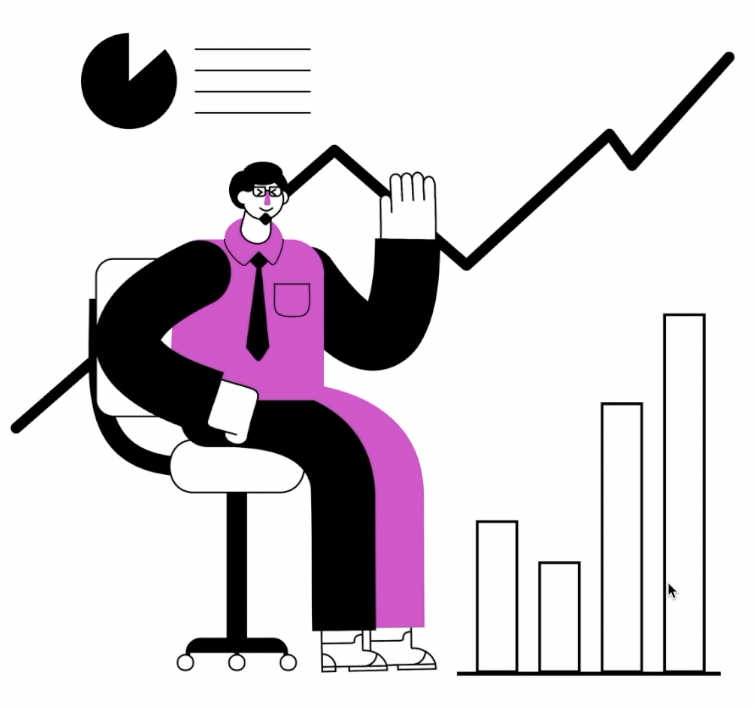

In the last notebook, I loaded and cleaned the dataset. In this notebook, I will carry out 3 types of analysis
- Univariate Analysis
- Multivariate Analysis
- Correlation Analysis

Further details can be found below:

## Notebook Contents

##### INTRODUCTION

   - loading the dataset
   - dropping unnecessary columns

##### SECTION 1

1: Univariate Analysis

In this section, I will look at one variable at a time. I will look at:

   - 1.1: distributions
   - 1.2: outliers
   - 1.3: trends

##### SECTION 2

2: Multivariate Analysis

In this section, I will look at each variable in relation to our target variable. I will look at
   - 2.1: to what extent is each variable likely to be important to the machine learning models in the following notebook

I will also do additional analysis if necessary.


##### SECTION 3

3: Pre Processing & Correlation Analysis

Building on section 2, I will:
   - 3.1: firstly, change all categorical columns to binary columns (this is required for the next step) and drop all non-numeric value columns
   - 3.2: use a seaborn heatmap to identify multicollinearity
   - 3.3: add to my insights from section 2 regarding which features are likely to be essential for ML models

Each section will be split into 3 subsections as follows 
- 1: Numerical Column With No Range Limit
- 2: Numerical Column Rating 0 - 5
- 3: Categorical Columns


I will export the final dataframe.

***

## Introduction

In [12]:
# Below I am importing the relavent libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [13]:
# Below I am loading the dataset from the location we saved the last .csv file in notebook 1
df= pd.read_csv('../data/cleaned_airlines.csv')

In [14]:
# below I am loading the dataset in and confirming it looks correct
df.head(2)

,Unnamed: 0,id,satisfaction_target,customer_gender,customer_loyalty_type,customer_age,customer_travel_type,customer_class_type,flight_distance,flight_wifi_satisfaction_rating,...,seat_comfort_satisfaction_rating,inflight_entertainment_satisfaction_rating,onboard_service_satisfaction_rating,leg_room_satisfaction_rating,baggage_handling_satisfaction_rating,checkin_service_satisfaction_rating,inflight_service_satisfaction_rating,cleanliness_satisfaction_rating,departure_delay_in_minutes,arrival_delay_in_minutes
0,0,117135,Satisfied,Male,Disloyal,56,Personal,Economy,369,0,...,3,3,1,5,3,3,4,3,0,0.0
1,1,72091,Satisfied,Male,Disloyal,49,Personal,Economy,2486,0,...,3,2,1,1,4,4,3,2,0,0.0


In downloading and importing the data, we have a new index column: 'Unnamed: 0'. We can safely remove this column since we already have a built-in index.

In [15]:
# Below I am dropping the 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

In theory, the 'id' column could represent time to some degree. The first customer could have been given an id of 1 and the next 2 etc. However, we don't know this for sure, and we don't know the time gaps between customers' IDs. Since id doesn't tell us anything, we must drop the column.

In [16]:
# Below I am dropping the column specified
df = df.drop('id', axis=1)

In [17]:
# Below I am sanity checking that the specified columns were dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   satisfaction_target                         129880 non-null  object 
 1   customer_gender                             129880 non-null  object 
 2   customer_loyalty_type                       129880 non-null  object 
 3   customer_age                                129880 non-null  int64  
 4   customer_travel_type                        129880 non-null  object 
 5   customer_class_type                         129880 non-null  object 
 6   flight_distance                             129880 non-null  int64  
 7   flight_wifi_satisfaction_rating             129880 non-null  int64  
 8   departure/arrival_time_satisfaction_rating  129880 non-null  int64  
 9   online_booking_satisfaction_rating          129880 non-null  int64  
 

Below is the updated data description for you to refer to. I put it here, so you don't have to go to another notebook to find it.

#### Data Description v2

Categorical Columns:
- `satisfaction_target` --> This is our target feature. It is whether or not a customer was satisfied
- `customer_gender` --> This shows whether or not the customer was male or female
- `customer_travel_type` --> This shows whether or not the customer travelled for business or personal travel
- `customer_class_type` --> This is the type of class the customer flew in (Eco, Eco Plus, Business)
- `customer_loyalty_type` --> This is whether or not the customer was loyal or disloyal


Numerical Column With No Range Limit:
- `customer_age` --> This is the age of the customer
- `flight_distance` --> This is the flight distance in miles
- `departure_delay_in_minutes` --> This is the number of minutes the flight was delayed at departure
- `arrival_delay_in_minutes` --> This is the number of minutes the flight was delayed at arrival to the destination

Numerical Column Rating 0 - 5:
- `flight_wifi_satisfaction_rating` --> This is the satisfaction rating of the inflight wifi
- `departure/arrival_time_satisfaction_rating` --> This is the satisfaction rating of the inflight wifi
- `online_booking_satisfaction_rating` --> This is the satisfaction rating of the online booking process
- `food/drink_satisfaction_rating` --> This is the satisfaction rating of the food and drink offered in flight
- `online_booking_satisfaction_rating` --> This is the satisfaction rating of the online boarding
- `seat_comfort_satisfaction_rating` --> This is the satisfaction rating of the inflight seats
- `inflight_service_satisfaction_rating` --> This is the satisfaction rating of the inflight entertainment
- `onboard_service_satisfaction_rating` --> This is the satisfaction rating of onboard service
- `baggage_handling_satisfaction_rating` --> This is the satisfaction rating of baggage handling
- `checkin_service_satisfaction_rating` --> This is the satisfaction rating of the check in service
- `leg_room_satisfaction_rating` --> This is the satisfaction rating of inflight leg room
- `inflight_service_satisfaction_rating` --> This is the satisfaction rating of the inflight service
- `gate_location_satisfaction_rating` --> This is the satisfaction rating of gate location
- `cleanliness_satisfaction_rating` --> This is the satisfaction rating of how clean the aeroplane

***

## SECTION 1

## Univariate Analysis: Numerical Column With No Range Limit

In this section, I will look at one variable at a time. I will look at:

- distributions
- outliers
- trends

I will be exploring each numerical column without a range limit. In my case, it includes:
- `customer_age` --> This is the age of the customer
- `flight_distance` --> This is the flight distance in miles
- `departure_delay_in_minutes` --> This is the number of minutes the flight was delayed at departure
- `arrival_delay_in_minutes` --> This is the number of minutes the flight was delayed at arrival to destination

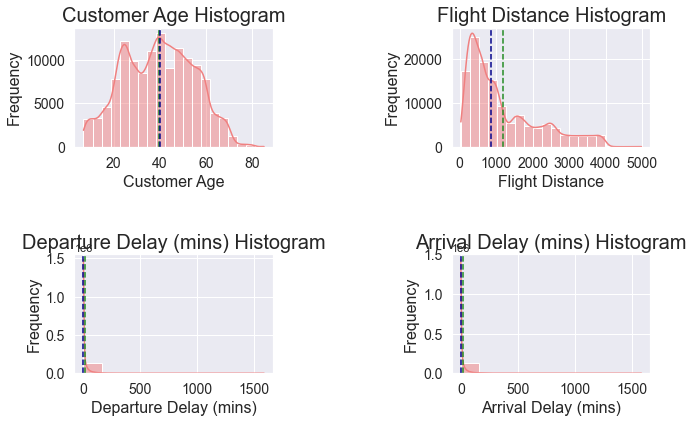

In [18]:
# Below I am creating a histogram for each column specified above in a series of subplots

# Below i am specifying the number of rows and columns for subplots & the figure size of each subplot
plt.subplots(2, 2, figsize = (10, 6))

# Below I am specifying the quadrant the subplot will be displayed in
plt.subplot(2,2,1)

# Below I am plotting the histogram
sns.set(style="darkgrid")
sns.histplot(data=df, x="customer_age", bins=20, kde=True, color='lightcoral')

# Below I am adding lines for the median & mean to the histogram
plt.axvline((df['customer_age'].mean()), color='forestgreen', linestyle='--')
plt.axvline((df['customer_age'].median()), color='darkblue', linestyle='--')

# Below I am adding the title & label details
plt.title('Customer Age Histogram', fontsize=20)
plt.xlabel('Customer Age', fontsize=16)   
plt.ylabel('Frequency', fontsize=16)

# Below I am increasing the tick size so it's easier to identify the histogram
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2,2,2)
sns.set(style="darkgrid")
sns.histplot(data=df, x="flight_distance", bins=20, kde=True, color='lightcoral')
plt.axvline((df['flight_distance'].mean()), color='forestgreen', linestyle='--')
plt.axvline((df['flight_distance'].median()), color='darkblue', linestyle='--')
plt.title('Flight Distance Histogram', fontsize=20)
plt.xlabel('Flight Distance', fontsize=16)   
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2,2,3)
sns.set(style="darkgrid")
sns.histplot(data=df, x="departure_delay_in_minutes", bins=10, kde=True, color='lightcoral')
plt.axvline((df['departure_delay_in_minutes'].mean()), color='forestgreen', linestyle='--')
plt.axvline((df['departure_delay_in_minutes'].median()), color='darkblue', linestyle='--')
plt.title('Departure Delay (mins) Histogram', fontsize=20)
plt.xlabel('Departure Delay (mins)', fontsize=16)   
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2,2,4)
sns.set(style="darkgrid")
sns.histplot(data=df, x="arrival_delay_in_minutes", bins=10, kde=True, color='lightcoral')
plt.axvline((df['arrival_delay_in_minutes'].mean()), color='forestgreen', linestyle='--')
plt.axvline((df['arrival_delay_in_minutes'].median()), color='darkblue', linestyle='--')
plt.title('Arrival Delay (mins) Histogram', fontsize=20)
plt.xlabel('Arrival Delay (mins)', fontsize=16)   
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Below I am adding space inbetween each subplot so they don't overlap
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.9)
plt.show()

In [19]:
# Below I am confirming the maximum flight distance
df.flight_distance.max()

4983

###### Customer Age
- The data is roughly a normal distribution but is not perfectly normally distributed. This is because the mean is slightly less than the median, which means the histogram is slightly left-skewed
- The average age is equal to ~ [the average age of a UK resident.](https://www.statista.com/statistics/281288/median-age-of-the-population-of-the-uk/#:~:text=Median%20age%20of%20the%20population%20of%20the%20UK%202001%2D2020&text=In%202020%2C%20the%20median%20age,median%20age%20remained%20at%2040). Traditionally, for cheaper short-haul airlines, the average age would be below average. This indicates the airline is not a low-cost short-haul airline. For example:
    - [Ryanair has just 6% of passangers over 56](https://www.ryanair.com/doc/advertise/OverheadLocker.pdf)
    - [American airlines has 31% of passangers between the ages of 50 and 64](https://www.statista.com/statistics/227443/airline-passengers-of-american-airlines-usa/)
- Interestingly, whilst a small number of passengers are between the ages of 0-10, a minute number of passengers are between 75-85. These individuals represent our outliers. This may occur since airlines facilitate young children, infants and even babies to fly - but there is a physical limit to how old people feel comfortable flying.
- Overall, the **insights from this project will represent individuals between the ages of 25-55**, since most of the survery fillers fall into this age range

###### Flight Distance
- The histogram skews right significantly, as the mean is much more than the median. This can also be seen visually.
- The mean flight distance is ~ 1200 miles. For context:
    - London ---> Paris is ~210 miles
    - London ---> Milan is ~600 miles
    - London ---> Budapest is ~900 miles
    - London ---> Athens is  ~1500 miles
    - London ---> New York is ~ 3500 miles
    
Considering the average distance is 1200 miles, this suggests that the airline doesn't operate many long haul flights (flights that last > 7 hours/ roughly 3200 miles).

- This is shown visually, as, after 1200 miles, there is a steep dropoff. Most of the flights are centred around the 500-mile range
- The airline does offer a small number of flights that would be classified as long haul, but none more than 5000 miles. These could be considered outliers.

- For context:
    - London --->  Nairobi is ~4200 miles
    - London ---> Miami is ~4400 miles
    - London ---> Mumbai is ~4500 miles
    - London ---> Los Angeles is ~5442 miles
   
Overall this means: [(source)](https://www.themcggroup.com/blog/the-differences-between-longhaul-and-shorthaul-piloting/bp67/#:~:text=Short%2Dhaul%20is%20a%20flight,that%20extend%20beyond%206%20hours.)
- The airline offers a larger number of short haul flights (< 1500 air miles/ < 3h30 min flights)
- The ailine offers a large number of medium haul flights (< 3500 air miles / <6h30 min flights)
- The airline offers a small number of long haul flights (> 3500 air miles / > 6h 30 flights)
- The airline offers no super/ultra long haul flights (>5000 air miles)

Therfore, the **insights from this project are from the perspective of passangers flying mainly on short and medium haul flights**. This is important, since the aspects of the fight a customer values, differs between a flight from London to Paris (1hr 30 mins) compared to London to Singapore (13hr 30 mins).

In [20]:
# Below I am using the .describe function to get extra statistical details on the 'arrival_delay_in_minutes' column
df.arrival_delay_in_minutes.describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: arrival_delay_in_minutes, dtype: float64

In [21]:
# Below I am using the .describe function to get extra statistical details on the 'departure_delay_in_minutes' column
df.departure_delay_in_minutes.describe()

count    129880.000000
mean         14.713713
std          38.071126
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: departure_delay_in_minutes, dtype: float64

###### Arrival/Departure delay in minutes

- Both delay histograms show that only a small % of flights are delayed (~10% of flights are delayed), but both histograms are right skewed
- Flights are delayed for only 12 mins in 25% of cases, but in the worst-case scenario, a flight was delayed (arrival/departure) for over 26 hours
- On average, a flight is delayed in departure and arrival for 15 minutes. This is surprisingly high however it's likely the outliers are skewing this insight

***

## Univariate Analysis: Numerical Column Rating 0 - 5

In this section, I will look at one variable at a time. I will look at:

- distributions
- outliers
- trends

I will explore each numerical column with a range limit (for me, these are satisfaction ratings). In my case, it includes:
- `flight_wifi_satisfaction_rating` --> This is the satisfaction rating of the inflight wifi
- `departure/arrival_time_satisfaction_rating` --> This is the satisfaction rating of the inflight wifi
- `online_booking_satisfaction_rating` --> This is the satisfaction rating of the online booking process
- `food/drink_satisfaction_rating` --> This is the satisfaction rating of the food and drink offered in flight
- `online_boarding_satisfaction_rating` --> This is the satisfaction rating of the online boarding
- `seat_comfort_satisfaction_rating` --> This is the satisfaction rating of the inflight seats
- `inflight_service_satisfaction_rating` --> This is the satisfaction rating of the inflight entertainment
- `onboard_service_satisfaction_rating` --> This is the satisfaction rating of onboard service
- `baggage_handling_satisfaction_rating` --> This is the satisfaction rating of baggage handling
- `checkin_service_satisfaction_rating` --> This is the satisfaction rating of the check in service
- `leg_room_satisfaction_rating` --> This is the satisfaction rating of inflight leg room
- `inflight_service_satisfaction_rating` --> This is the satisfaction rating of the inflight service
- `gate_location_satisfaction_rating` --> This is the satisfaction rating of gate location
- `cleanliness_satisfaction_rating` --> This is the satisfaction rating of how clean the aeroplane

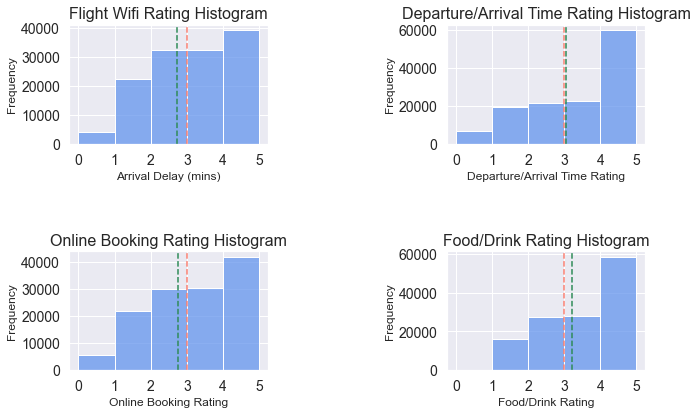

In [22]:
plt.subplots(2, 2, figsize = (10, 6))

plt.subplot(2,2,1)
sns.set(style="white")
sns.histplot(data=df, x="flight_wifi_satisfaction_rating", bins=5, color='cornflowerblue')
plt.axvline((df['flight_wifi_satisfaction_rating'].mean()), color='seagreen', linestyle='--')
plt.axvline((df['flight_wifi_satisfaction_rating'].median()), color='salmon', linestyle='--')
plt.title('Flight Wifi Rating Histogram', fontsize=16)
plt.xlabel('Arrival Delay (mins)', fontsize=12)   
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2,2,2)
sns.set(style="white")
sns.histplot(data=df, x="departure/arrival_time_satisfaction_rating", bins=5, color='cornflowerblue')
plt.axvline((df['departure/arrival_time_satisfaction_rating'].mean()), color='seagreen', linestyle='--')
plt.axvline((df['departure/arrival_time_satisfaction_rating'].median()), color='salmon', linestyle='--')
plt.title('Departure/Arrival Time Rating Histogram', fontsize=16)
plt.xlabel('Departure/Arrival Time Rating', fontsize=12)   
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2,2,3)
sns.set(style="white")
sns.histplot(data=df, x="online_booking_satisfaction_rating", bins=5, color='cornflowerblue')
plt.axvline((df['online_booking_satisfaction_rating'].mean()), color='seagreen', linestyle='--')
plt.axvline((df['online_booking_satisfaction_rating'].median()), color='salmon', linestyle='--')
plt.title('Online Booking Rating Histogram', fontsize=16)
plt.xlabel('Online Booking Rating', fontsize=12)   
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2,2,4)
sns.set(style="white")
sns.histplot(data=df, x="food/drink_satisfaction_rating", bins=5, color='cornflowerblue')
plt.axvline((df['food/drink_satisfaction_rating'].mean()), color='seagreen', linestyle='--')
plt.axvline((df['food/drink_satisfaction_rating'].median()), color='salmon', linestyle='--')
plt.title('Food/Drink Rating Histogram', fontsize=16)
plt.xlabel('Food/Drink Rating', fontsize=12)   
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.9)
plt.show()

###### Flight Wifi Rating
- The histogram is left-skewed with an average rating of 2.72. This is the lowest average rating of all satisfaction ratings.
- This indicates that the airline has relatively poor flight wifi. This is more common for less expensive, shorter distance focussed airlines where wifi is likely less important for passengers.

###### Online Booking Rating
- The histogram is left-skewed with an average rating of 2.75. This is the second lowest average rating of all satisfaction ratings.
-  This indicates that the airline has a relatively poor online booking process. This is surprising as this is the perfect way to reduce in-person costs and increase efficiencies.

###### Departure/Arrival Rating
- Here, the mean and median are roughly equal, indicating a roughly normal distribution
- The average rating is 3.05, the fourth worst rating. Considering 25% of flights are delayed for an average of 12 minutes, it makes sense that the rating here may be lower than desired.

###### Food/Drink Rating

- The histogram is right skewed
- The average rating is 3.2, which is below average
- There are no ratings at zero


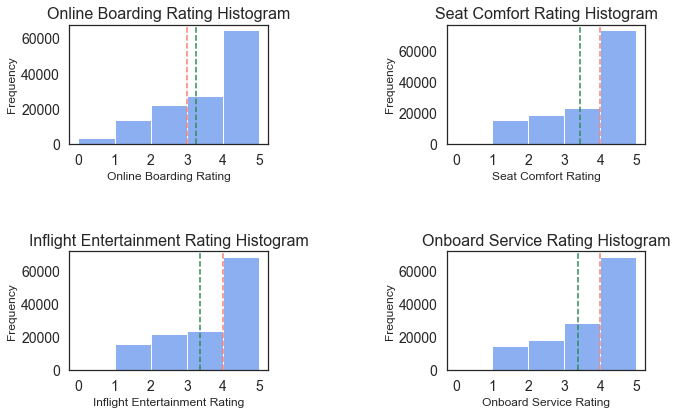

In [23]:
plt.subplots(2, 2, figsize = (10, 6))

plt.subplot(2,2,1)
sns.set(style="white")
sns.histplot(data=df, x="online_boarding_satisfaction_rating", bins=5, color='cornflowerblue')
plt.axvline((df['online_boarding_satisfaction_rating'].mean()), color='seagreen', linestyle='--')
plt.axvline((df['online_boarding_satisfaction_rating'].median()), color='salmon', linestyle='--')
plt.title('Online Boarding Rating Histogram', fontsize=16)
plt.xlabel('Online Boarding Rating', fontsize=12)   
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.subplot(2,2,2)
sns.set(style="white")
sns.histplot(data=df, x="seat_comfort_satisfaction_rating", bins=5, color='cornflowerblue')
plt.axvline((df['seat_comfort_satisfaction_rating'].mean()), color='seagreen', linestyle='--')
plt.axvline((df['seat_comfort_satisfaction_rating'].median()), color='salmon', linestyle='--')
plt.title('Seat Comfort Rating Histogram', fontsize=16)
plt.xlabel('Seat Comfort Rating', fontsize=12)   
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2,2,3)
sns.set(style="white")
sns.histplot(data=df, x="inflight_entertainment_satisfaction_rating", bins=5, color='cornflowerblue')
plt.axvline((df['inflight_entertainment_satisfaction_rating'].mean()), color='seagreen', linestyle='--')
plt.axvline((df['inflight_entertainment_satisfaction_rating'].median()), color='salmon', linestyle='--')
plt.title('Inflight Entertainment Rating Histogram', fontsize=16)
plt.xlabel('Inflight Entertainment Rating', fontsize=12)   
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2,2,4)
sns.set(style="white")
sns.histplot(data=df, x="onboard_service_satisfaction_rating", bins=5, color='cornflowerblue')
plt.axvline((df['onboard_service_satisfaction_rating'].mean()), color='seagreen', linestyle='--')
plt.axvline((df['onboard_service_satisfaction_rating'].median()), color='salmon', linestyle='--')
plt.title('Onboard Service Rating Histogram', fontsize=16)
plt.xlabel('Onboard Service Rating', fontsize=12)   
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.9)
plt.show()

###### Online Boarding Rating
- The histogram is right skewed
- The average rating is 3.25

###### Seat Comfort Rating
- The histogram is left skewed
- The average rating is 3.44, which is the third highest rating. 
- This means the airline is offering relatively above-average seat comfort to passengers.

###### Inflight Entertainment Rating
- The histogram is left skewed
- The average rating is 3.35, which is above average
- Initially, it looked like the airline had poor technology (online booking, wifi etc.), but this may not always be the case.

###### Onboard Service Rating
- The histogram is left skewed
- The average rating is 3.38, the fourth highest satisfaction rating
- This suggests the airline is offering relatively above-average onboard service

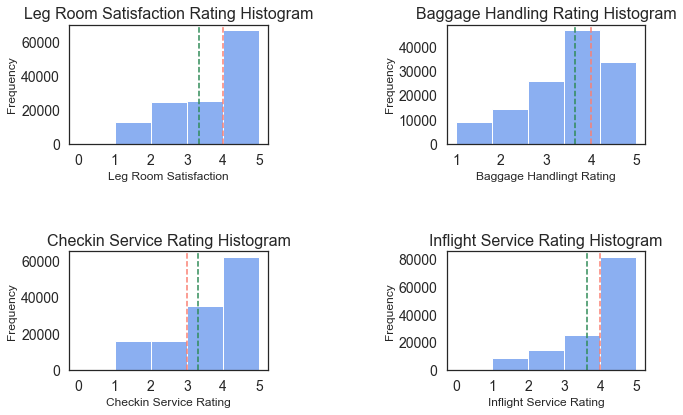

In [24]:
plt.subplots(2, 2, figsize = (10, 6))

plt.subplot(2,2,1)
sns.set(style="white")
sns.histplot(data=df, x="leg_room_satisfaction_rating", bins=5, color='cornflowerblue')
plt.axvline((df['leg_room_satisfaction_rating'].mean()), color='seagreen', linestyle='--')
plt.axvline((df['leg_room_satisfaction_rating'].median()), color='salmon', linestyle='--')
plt.title('Leg Room Satisfaction Rating Histogram', fontsize=16)
plt.xlabel('Leg Room Satisfaction', fontsize=12)   
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2,2,2)
sns.set(style="white")
sns.histplot(data=df, x="baggage_handling_satisfaction_rating", bins=5, color='cornflowerblue')
plt.axvline((df['baggage_handling_satisfaction_rating'].mean()), color='seagreen', linestyle='--')
plt.axvline((df['baggage_handling_satisfaction_rating'].median()), color='salmon', linestyle='--')
plt.title('Baggage Handling Rating Histogram', fontsize=16)
plt.xlabel('Baggage Handlingt Rating', fontsize=12)   
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2,2,3)
sns.set(style="white")
sns.histplot(data=df, x="checkin_service_satisfaction_rating", bins=5, color='cornflowerblue')
plt.axvline((df['checkin_service_satisfaction_rating'].mean()), color='seagreen', linestyle='--')
plt.axvline((df['checkin_service_satisfaction_rating'].median()), color='salmon', linestyle='--')
plt.title('Checkin Service Rating Histogram', fontsize=16)
plt.xlabel('Checkin Service Rating', fontsize=12)   
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2,2,4)
sns.set(style="white")
sns.histplot(data=df, x="inflight_service_satisfaction_rating", bins=5, color='cornflowerblue')
plt.axvline((df['inflight_service_satisfaction_rating'].mean()), color='seagreen', linestyle='--')
plt.axvline((df['inflight_service_satisfaction_rating'].median()), color='salmon', linestyle='--')
plt.title('Inflight Service Rating Histogram', fontsize=16)
plt.xlabel('Inflight Service Rating', fontsize=12)   
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.9)
plt.show()

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

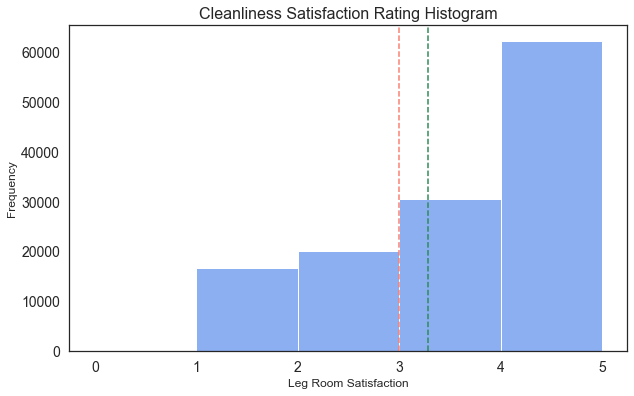

In [25]:
plt.figure(figsize=(10, 6))
sns.set(style="white")
sns.histplot(data=df, x="cleanliness_satisfaction_rating", bins=5, color='cornflowerblue')
plt.axvline((df['cleanliness_satisfaction_rating'].mean()), color='seagreen', linestyle='--')
plt.axvline((df['cleanliness_satisfaction_rating'].median()), color='salmon', linestyle='--')
plt.title('Cleanliness Satisfaction Rating Histogram', fontsize=16)
plt.xlabel('Leg Room Satisfaction', fontsize=12)   
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

###### Leg Room Rating
- The histogram is left skewed
- The average rating is 3.35, which is ~ average

###### Baggage Handling Rating
- The histogram is left skewed
- The average rating is 3.63; this is the second highest satisfaction rating
- This suggests the airline relatively handles baggage handling very well

###### Checkin Service Rating
- The histogram is right skewed
- The average rating is 3.30

###### Inflight Service Rating
- The histogram left skewed
- The average rating is 3.64, this is the highest satisfaction rating

###### Cleanliness Service Rating
- The histogram is right skewed
- The average rating is 3.28

### Sorted Satisfaction Ratings

In [26]:
print(f"Average  inflight service satisfaction is {df.inflight_service_satisfaction_rating.mean()}.")
print(f"Average  baggage handling satisfaction is {df.baggage_handling_satisfaction_rating .mean()}.")
print(f"Average  seat comfort satisfaction satisfaction is {df.seat_comfort_satisfaction_rating.mean()}.")
print(f"Average  onboard service satisfaction is {df.onboard_service_satisfaction_rating.mean()}.")
print(f"Average  inflight entertainment satisfaction is {df.inflight_entertainment_satisfaction_rating.mean()}.")
print(f"Average  leg room satisfaction is {df.leg_room_satisfaction_rating.mean()}.")
print(f"Average  checkin service satisfaction is {df.checkin_service_satisfaction_rating.mean()}.")
print(f"Average  cleanliness satisfaction is {df.cleanliness_satisfaction_rating.mean()}.")
print(f"Average  online boarding satisfaction is {df.online_boarding_satisfaction_rating.mean()}.")
print(f"Average  food/drink satisfaction is {df['food/drink_satisfaction_rating'].mean()}.")
print(f"Average  departure/arrival_time satisfaction is {df['departure/arrival_time_satisfaction_rating'].mean()}.")
print(f"Average  gate location satisfaction is {df.gate_location_satisfaction_rating.mean()}.")
print(f"Average  online booking satisfaction is {df.online_booking_satisfaction_rating.mean()}.")
print(f"Average  wifi satisfaction is {df.flight_wifi_satisfaction_rating.mean()}.")

Average  inflight service satisfaction is 3.6421927933477054.
Average  baggage handling satisfaction is 3.632114259316292.
Average  seat comfort satisfaction satisfaction is 3.4413612565445026.
Average  onboard service satisfaction is 3.3830227902679395.
Average  inflight entertainment satisfaction is 3.358076686171851.
Average  leg room satisfaction is 3.3508777332922697.
Average  checkin service satisfaction is 3.3062673236834.
Average  cleanliness satisfaction is 3.286325839236218.
Average  online boarding satisfaction is 3.252633199876809.
Average  food/drink satisfaction is 3.2047736372035724.
Average  departure/arrival_time satisfaction is 3.0575993224514937.
Average  gate location satisfaction is 2.976924853711118.
Average  online booking satisfaction is 2.7568755774561136.
Average  wifi satisfaction is 2.7286957191253465.


Overall there is a mix of satisfaction ratings. From a technology perspective: 
- the airline has a good inflight entertainment system, but a poor online boarding and wifi rating
- the airline has extremely strong inflight and baggage handling service, but cleanliness is average and food and drink satisfaction is less than desired

Overall I would predict the top and bottom satisfaction features to play a higher role in feature importance than those in the middle.

***

## Univariate Analysis: Categorical Columns

In this section, I will look at one variable at a time. I will look at:

- distributions
- outliers
- trends

I will be exploring each categorical column. In my case, it includes:
- `satisfaction_target` --> This is our target feature. It is whether or not a customer was satisfied
- `customer_gender` --> This shows whether or not the customer was male or female
- `customer_travel_type` --> This shows whether or not the customer travelled for business or personal travel
- `customer_class_type` --> This is the type of class the customer flew in (Eco, Eco Plus, Business)
- `customer_loyalty_type` --> This is whether or not the customer was loyal or disloyal

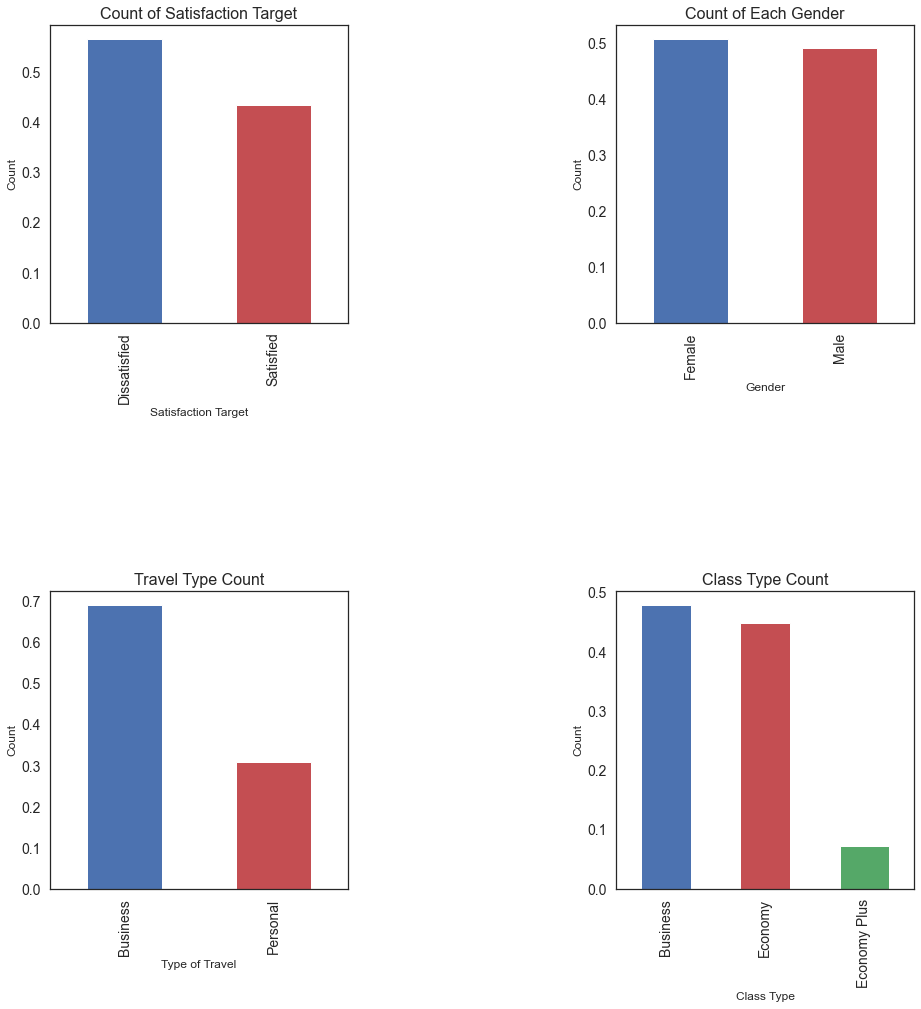

In [27]:
from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))

plt.subplots(2, 2, figsize = (15, 15))

plt.subplot(2,2,1)
df['satisfaction_target'].value_counts(normalize=True).plot(kind='bar', color = my_colors)
plt.title('Count of Satisfaction Target', fontsize=16)
plt.xlabel('Satisfaction Target', fontsize=12)   
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2,2,2)
df['customer_gender'].value_counts(normalize=True).plot(kind='bar', color = my_colors)
plt.title('Count of Each Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)   
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2,2,3)
df['customer_travel_type'].value_counts(normalize=True).plot(kind='bar', color = my_colors)
plt.title('Travel Type Count', fontsize=16)
plt.xlabel('Type of Travel', fontsize=12)   
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2,2,4)
df['customer_class_type'].value_counts(normalize=True).plot(kind='bar', color = my_colors)
plt.title('Class Type Count', fontsize=16)
plt.xlabel('Class Type', fontsize=12)   
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.9)
plt.show()

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

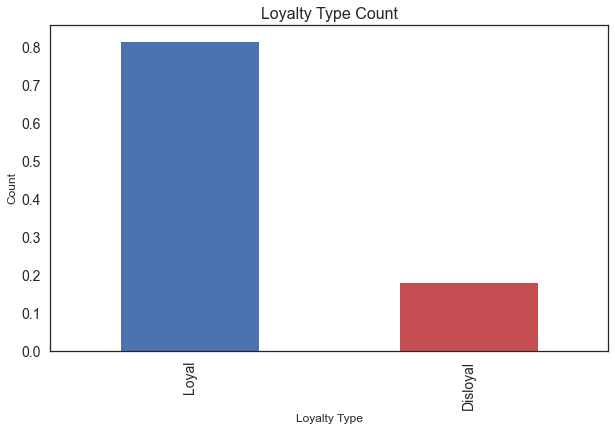

In [28]:
# Below I am creating the bar chart for 'Loyalty Type Count'
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
plt.figure(figsize=(10, 6))
df['customer_loyalty_type'].value_counts(normalize=True).plot(kind='bar', color = my_colors)
plt.title('Loyalty Type Count', fontsize=16)
plt.xlabel('Loyalty Type', fontsize=12)   
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

[source for colors](https://stackoverflow.com/questions/11927715/how-to-give-a-pandas-matplotlib-bar-graph-custom-colors)

In [29]:
# Below I am creating a dataframe for each bar chart result to 2 decimal places
satisfaction_type = pd.DataFrame(df['satisfaction_target'].value_counts(normalize=True).round(2))
gender_type = pd.DataFrame(df['customer_gender'].value_counts(normalize=True).round(2))
travel_type = pd.DataFrame(df['customer_travel_type'].value_counts(normalize=True).round(2))
class_type = pd.DataFrame(df['customer_class_type'].value_counts(normalize=True).round(2))
loyalty_type = pd.DataFrame(df['customer_loyalty_type'].value_counts(normalize=True).round(2))

In [35]:
print("Satisfaction_type % split")
satisfaction_type 

Satisfaction_type % split


,satisfaction_target
Dissatisfied,0.57
Satisfied,0.43


In [36]:
print("Gender_type % split")
gender_type

Gender_type % split


,customer_gender
Female,0.51
Male,0.49


In [37]:
print("Travel_type % split")
travel_type

Travel_type % split


,customer_travel_type
Business,0.69
Personal,0.31


In [38]:
print("Class_type % split")
class_type

Class_type % split


,customer_class_type
Business,0.48
Economy,0.45
Economy Plus,0.07


In [39]:
print("Loyalty_type % split")
loyalty_type

Loyalty_type % split


,customer_loyalty_type
Loyal,0.82
Disloyal,0.18


###### Satisfaction Target
- Surprisingly, the number of dissatisfied customers is outweighed by satisfied ones by 10% in real terms
- This means for the airline to still perform well financially, either satisfied customers need to be: 
    - frequently flying (be loyal customers)
    - higher profit customers, i.e. always paying for business class etc.

###### Gender
- The gender split is ~50/50
- This suggests gender is not relavent to feature importance

###### Customer Travel Type
- There are significantly more business customers than regular customers, with there being ~ a 70/30 split, respectively
- This plays into the point earlier where the airline may be relying on business travellers who are more likely to:
    - Pay more for a ticket (travel in business class, for example)
    - Fly more frequently

I expect travel type to be an important feature in the ML models.

###### Class Type
- The most common class type is business, which makes up ~ half of all travel class types. This is followed by economy with 44%, and a small % of customers chose economy plus. Here are the takeaways:

1: A plane typically has a relatively small number of business/first class cabin seats, with the rest being economy. This is because only a few passengers are willing to pay this much higher asking price. As a result, I am very surprised to see such a high number of passengers travelling in business class. Either:
    
- the airline has an unusually high number of business class seats within its cabin layout
- on each flight, the business class seats are almost always full and relatively few economy seats are
    
Both of these seem unlikely. In particular the latter. A key figure for airlines is load factor: the % of seats that are occupied on a specific route. The aim is always to get this to as close to 100% as possible, with the [average in 2019 being ~83.](https://www.statista.com/statistics/658830/passenger-load-factor-of-commercial-airlines-worldwide/#:~:text=Commercial%20airlines%20worldwide%20%2D%20passenger%20load%20factor%202005%2D2022&text=The%20combined%20passenger%20load%20factor,factor%20was%20around%2082.6%20percent). If economy seats are rarely full, then the load factor would be relatively very low. For example air france's A318 (which is used for short & medium haul flights) has [~72% of seats listed as '_economy seats_'](https://www.statista.com/statistics/658830/passenger-load-factor-of-commercial-airlines-worldwide/#:~:text=Commercial%20airlines%20worldwide%20%2D%20passenger%20load%20factor%202005%2D2022&text=The%20combined%20passenger%20load%20factor,factor%20was%20around%2082.6%20percent). In this example, if business and economy demand was the same then load capacity would be ~60% - far below the industry average, which would make it an outlier to still be profitable.


2: Only a small number of passengers travelled in economy plus (7%). However, this is likely due to the limited rate at which it is offered. Premium economy is typically a niche only offered on popular flight destinations which are longer haul flights.

So I can assume that demand for economy plus is low because the airline operates few long haul routes so economy plus is likely offered rarely. Also, airlines are apprehensive to offer economy plus out of fear they cannbalise business class.  For example, [Emirates only introduced premium economy](https://www.emirates.com/media-centre/emirates-launches-full-premium-economy-experience/#:~:text=The%20new%20cabin%20class%2C%20which,August%2C%20and%20Christchurch%20from%20December) (equivalent to economy plus in this dataset) this summer on 4 select routes.

Overall I expect class type to be an important feature in relation to predicting customer satisfaction.

###### Loyalty Type
- Almost as if a juxtaposition, whilst the majority of passengers are dissatisfied with the airline (56%), the vast majority of passengers are loyal (81%). This may be due to the airline being the only choice for specific routes and thus gaining loyalty. Even if its customers are overall dissatisfied, due to the monopoly over select routes, they still fly with them again. This suggests 'loyalty type' will play a key role in feature importance.

***

## SECTION 2

## Multivariate Analysis: Numerical Column With No Range Limit

In this section, I will look at each variable in relation to our target variable. I will look at
- to what extent each variable is likely to be important to the machine learning models in the next notebook

This includes the following columns:
- `customer_age` --> This is the age of the customer
- `flight_distance` --> This is the flight distance in miles
- `departure_delay_in_minutes` --> This is the number of minutes the flight was delayed at departure
- `arrival_delay_in_minutes` --> This is the number of minutes the flight was delayed at arrival at the destination

For these variables, I will use a boxplot.

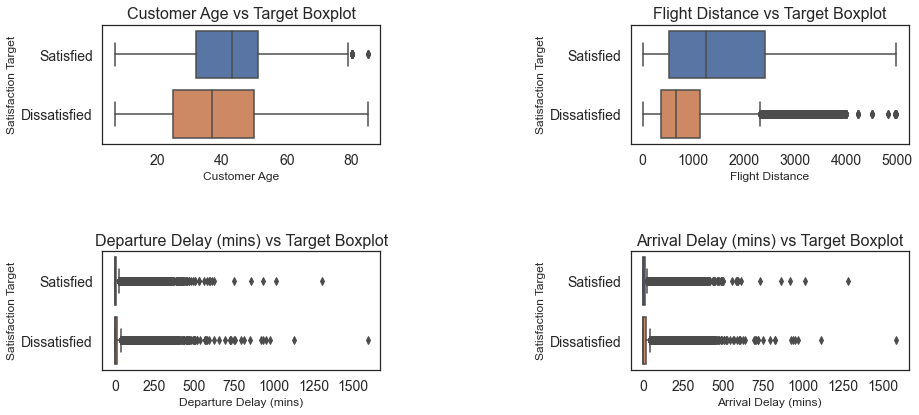

In [124]:
plt.subplots(2, 2, figsize = (14, 6))
sns.set(style="whitegrid")

plt.subplot(2,2,1)
sns.boxplot(data = df, x = 'customer_age', y = 'satisfaction_target')
plt.title('Customer Age vs Target Boxplot', fontsize=16)
plt.xlabel('Customer Age', fontsize=12)   
plt.ylabel('Satisfaction Target', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.subplot(2,2,2)
sns.boxplot(data = df, x = 'flight_distance', y = 'satisfaction_target')
plt.title('Flight Distance vs Target Boxplot', fontsize=16)
plt.xlabel('Flight Distance', fontsize=12)   
plt.ylabel('Satisfaction Target', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.subplot(2,2,3)
sns.boxplot(data = df, x = 'departure_delay_in_minutes', y = 'satisfaction_target')
plt.title('Departure Delay (mins) vs Target Boxplot', fontsize=16)
plt.xlabel('Departure Delay (mins)', fontsize=12)   
plt.ylabel('Satisfaction Target', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.subplot(2,2,4)
sns.boxplot(data = df, x = 'arrival_delay_in_minutes', y = 'satisfaction_target')
plt.title('Arrival Delay (mins) vs Target Boxplot', fontsize=16)
plt.xlabel('Arrival Delay (mins)', fontsize=12)   
plt.ylabel('Satisfaction Target', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.9)
plt.show()

###### Customer Age
- The average customer age is lower for dissatisfied customers, though the maximum age of dissatisfied customers is several years over than the max age for satisfied customers (minus outliers). The difference between the two should increase the importance of 'customer age' to ML models. 

###### Flight Distance
- The two boxplots are very different.
    - The average flight distance of dissatisfied customers is lower which is unexpected, You would think longer flights have more time for issues to occur and in theory, should have less satisfaction but this is not the case 
    - Interestingly there are a large number of outliers for dissatisfied customers.
    
The difference between the two boxplots suggests 'flight distance' will be important to ML models.

###### Arrival/Depature Delay (mins) 
- Both boxplots are incredibly small and have a large number of outliers. A large number of outliers suggest ML models will not be able to learn from their data as much.
- As a reminder, one of these columns will be dropped later in this notebook

***

## Multivariate Analysis: Numerical Column (0-5)

In this section, I will look at each variable in relation to our target variable. I will look at
- to what extent is each variable likely to be important to the machine learning models in the next notebook

This includes the following columns:
- `flight_wifi_satisfaction_rating` --> This is the satisfaction rating of the inflight wifi
- `departure/arrival_time_satisfaction_rating` --> This is the satisfaction rating of the inflight wifi
- `online_booking_satisfaction_rating` --> This is the satisfaction rating of the online booking process
- `food/drink_satisfaction_rating` --> This is the satisfaction rating of the food and drink offered in flight
- `online_boarding_satisfaction_rating` --> This is the satisfaction rating of the online boarding
- `seat_comfort_satisfaction_rating` --> This is the satisfaction rating of the inflight seats
- `inflight_service_satisfaction_rating` --> This is the satisfaction rating of the inflight entertainment
- `onboard_service_satisfaction_rating` --> This is the satisfaction rating of onboard service
- `baggage_handling_satisfaction_rating` --> This is the satisfaction rating of baggage handling
- `checkin_service_satisfaction_rating` --> This is the satisfaction rating of the check in service
- `leg_room_satisfaction_rating` --> This is the satisfaction rating of inflight leg room
- `inflight_service_satisfaction_rating` --> This is the satisfaction rating of the inflight service
- `gate_location_satisfaction_rating` --> This is the satisfaction rating of gate location
- `cleanliness_satisfaction_rating` --> This is the satisfaction rating of how clean the aeroplane

For these variables, I will use a boxplot.

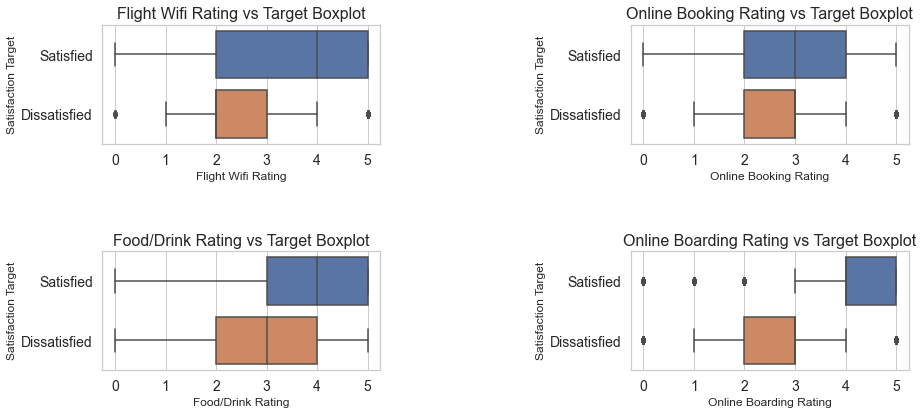

In [125]:
plt.subplots(2, 2, figsize = (14, 6))
sns.set(style="whitegrid")

plt.subplot(2,2,1)
sns.boxplot(data = df, x = 'flight_wifi_satisfaction_rating', y = 'satisfaction_target')
plt.title('Flight Wifi Rating vs Target Boxplot', fontsize=16)
plt.xlabel('Flight Wifi Rating', fontsize=12)   
plt.ylabel('Satisfaction Target', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.subplot(2,2,2)
sns.boxplot(data = df, x = 'online_booking_satisfaction_rating', y = 'satisfaction_target')
plt.title('Online Booking Rating vs Target Boxplot', fontsize=16)
plt.xlabel('Online Booking Rating', fontsize=12)   
plt.ylabel('Satisfaction Target', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.subplot(2,2,3)
sns.boxplot(data = df, x = 'food/drink_satisfaction_rating', y = 'satisfaction_target')
plt.title('Food/Drink Rating vs Target Boxplot', fontsize=16)
plt.xlabel('Food/Drink Rating', fontsize=12)   
plt.ylabel('Satisfaction Target', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.subplot(2,2,4)
sns.boxplot(data = df, x = 'online_boarding_satisfaction_rating', y = 'satisfaction_target')
plt.title('Online Boarding Rating vs Target Boxplot', fontsize=16)
plt.xlabel('Online Boarding Rating', fontsize=12)   
plt.ylabel('Satisfaction Target', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.9)
plt.show()

In all cases, the average rating of a satisfied customer exceeds that of a dissatisfied one. The difference between each boxplot suggests all variables above will be imprtant to ML models. 
- Especially 'flight wifi rating' where the difference between each boxplot is more heightened. 
- 'Online booking' will still be important but its average is not very different between the two boxplots so it will likely be the least important of the four.

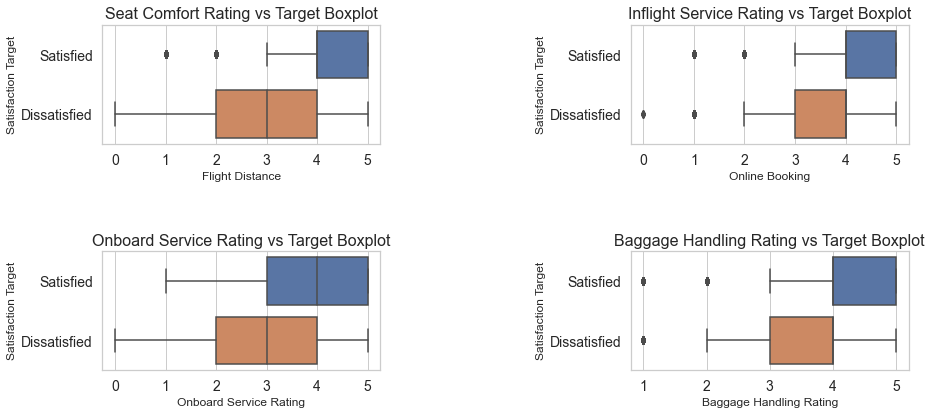

In [126]:
plt.subplots(2, 2, figsize = (14, 6))
sns.set(style="whitegrid")

plt.subplot(2,2,1)
sns.boxplot(data = df, x = 'seat_comfort_satisfaction_rating', y = 'satisfaction_target')
plt.title('Seat Comfort Rating vs Target Boxplot', fontsize=16)
plt.xlabel('Flight Distance', fontsize=12)   
plt.ylabel('Satisfaction Target', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.subplot(2,2,2)
sns.boxplot(data = df, x = 'inflight_service_satisfaction_rating', y = 'satisfaction_target')
plt.title('Inflight Service Rating vs Target Boxplot', fontsize=16)
plt.xlabel('Online Booking', fontsize=12)   
plt.ylabel('Satisfaction Target', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.subplot(2,2,3)
sns.boxplot(data = df, x = 'onboard_service_satisfaction_rating', y = 'satisfaction_target')
plt.title('Onboard Service Rating vs Target Boxplot', fontsize=16)
plt.xlabel('Onboard Service Rating', fontsize=12)   
plt.ylabel('Satisfaction Target', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.subplot(2,2,4)
sns.boxplot(data = df, x = 'baggage_handling_satisfaction_rating', y = 'satisfaction_target')
plt.title('Baggage Handling Rating vs Target Boxplot', fontsize=16)
plt.xlabel('Baggage Handling Rating', fontsize=12)   
plt.ylabel('Satisfaction Target', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.9)
plt.show()

In all cases, the average rating of a satisfied customer exceeds that of a dissatisfied one. The difference between each boxplot suggests all variables above will be imprtant to ML models. 

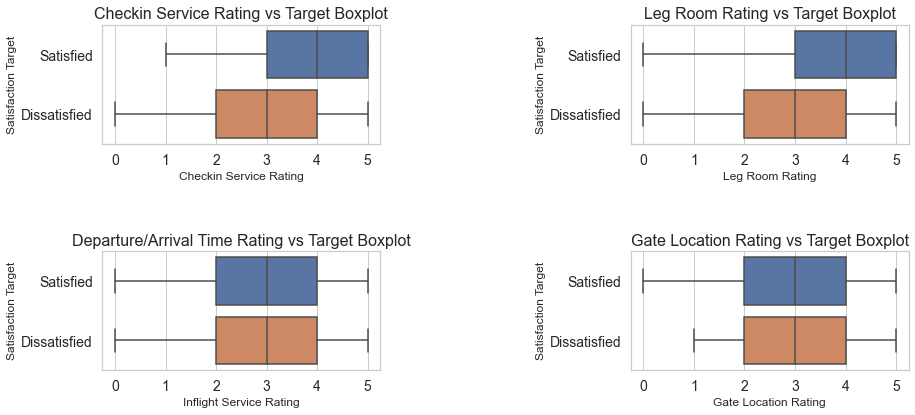

In [127]:
plt.subplots(2, 2, figsize = (14, 6))
sns.set(style="whitegrid")

plt.subplot(2,2,1)
sns.boxplot(data = df, x = 'checkin_service_satisfaction_rating', y = 'satisfaction_target')
plt.title('Checkin Service Rating vs Target Boxplot', fontsize=16)
plt.xlabel('Checkin Service Rating', fontsize=12)   
plt.ylabel('Satisfaction Target', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.subplot(2,2,2)
sns.boxplot(data = df, x = 'leg_room_satisfaction_rating', y = 'satisfaction_target')
plt.title('Leg Room Rating vs Target Boxplot', fontsize=16)
plt.xlabel('Leg Room Rating', fontsize=12)   
plt.ylabel('Satisfaction Target', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.subplot(2,2,3)
sns.boxplot(data = df, x = 'departure/arrival_time_satisfaction_rating', y = 'satisfaction_target')
plt.title('Departure/Arrival Time Rating vs Target Boxplot', fontsize=16)
plt.xlabel('Inflight Service Rating', fontsize=12)   
plt.ylabel('Satisfaction Target', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.subplot(2,2,4)
sns.boxplot(data = df, x = 'gate_location_satisfaction_rating', y = 'satisfaction_target')
plt.title('Gate Location Rating vs Target Boxplot', fontsize=16)
plt.xlabel('Gate Location Rating', fontsize=12)   
plt.ylabel('Satisfaction Target', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.9)
plt.show()

(array([0, 1]), [Text(0, 0, 'Satisfied'), Text(0, 1, 'Dissatisfied')])

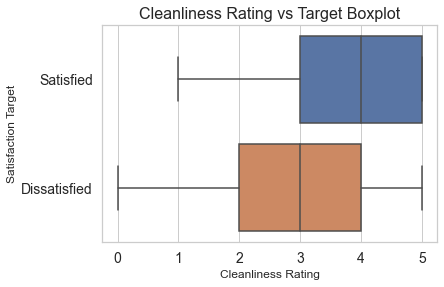

In [128]:
sns.boxplot(data = df, x = 'cleanliness_satisfaction_rating', y = 'satisfaction_target')
plt.title('Cleanliness Rating vs Target Boxplot', fontsize=16)
plt.xlabel('Cleanliness Rating', fontsize=12)   
plt.ylabel('Satisfaction Target', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

'Checkin service', 'leg room' & 'cleanliness' all demonstrate a varying average rating between each of their respective boxplots. This means they will play an important role in the ML models. 

On the other hand, 'gate location' & 'departure/arrival' time has the same average rating for both box plots. Since there is no difference, the ML models can't easily learn what makes a customer satisfied or not from the gate location rating etc. Therefore, the gate location rating & departure/arrival_time_satisfaction_rating are unlikely to play an importance in the ML models.

## Multivariate Analysis: Categorical Columns

In this section, I will look at each variable in relation to our target variable. I will look at
- to what extent is each variable likely to be important to the machine learning models in the next notebook

This includes the following columns:
- `satisfaction_target` --> This is our target feature. It is whether or not a customer was satisfied
- `customer_gender` --> This shows whether or not the customer was male or female
- `customer_travel_type` --> This shows whether or not the customer travelled for business or personal travel
- `customer_class_type` --> This is the type of class the customer flew in (Eco, Eco Plus, Business)
- `customer_loyalty_type` --> This is whether or not the customer was loyal or disloyal

For these variables, I will use a bar chart.

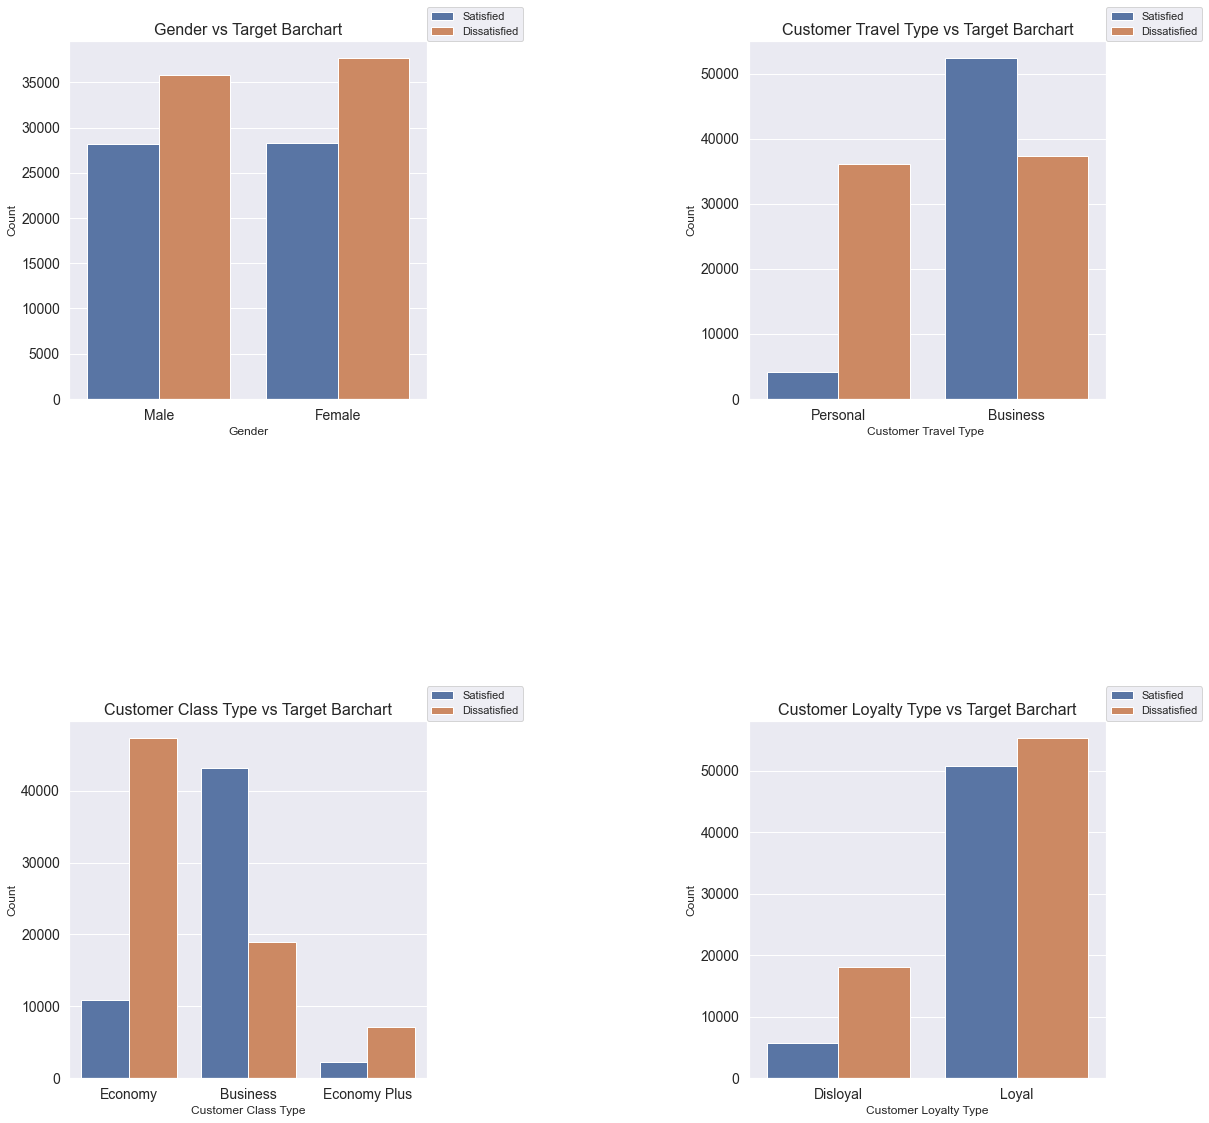

In [44]:
plt.subplots(2, 2, figsize = (18, 18))
sns.set(style="darkgrid")

plt.subplot(2,2,1)
sns.countplot(data = df, x = 'customer_gender', hue = 'satisfaction_target')
plt.title('Gender vs Target Barchart', fontsize=16)
plt.xlabel('Gender', fontsize=12)   
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = (1, 1))


plt.subplot(2,2,2)
sns.countplot(data = df, x = 'customer_travel_type', hue = 'satisfaction_target')
plt.title('Customer Travel Type vs Target Barchart', fontsize=16)
plt.xlabel('Customer Travel Type ', fontsize=12)   
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = (1, 1))


plt.subplot(2,2,3)
sns.countplot(data = df, x = 'customer_class_type', hue = 'satisfaction_target')
plt.title('Customer Class Type vs Target Barchart', fontsize=16)
plt.xlabel('Customer Class Type', fontsize=12)   
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = (1, 1))


plt.subplot(2,2,4)
sns.countplot(data = df, x = 'customer_loyalty_type', hue = 'satisfaction_target')
plt.title('Customer Loyalty Type vs Target Barchart', fontsize=16)
plt.xlabel('Customer Loyalty Type', fontsize=12)   
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = (1, 1))


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.9)
plt.show()

###### Gender 
- There is ~ no difference between the number of satisfied customers and their gender, this suggests that gender will not play an important role in regards to ML models

###### Travel Type 
- Whilst the number of dissatisfied customers is very similar for both personal and business travel, the number of satisfied customers is overwhelmingly those are travel for business purposes. This is a recurring theme and suggests the airline is potentially servicing regular passengers to a higher degree. Travel type will likely be important to ML models.

###### Class Type 
- Business travellers are much more likely to take business class, so it's not surprising to see business class travellers being satisfied at a much higher relative rate to economy or economy plus. 
- It's also possible that their business class is much better than other airlines, unlike their economy service. However, this would require much further analysis and likely extra data.
- Overall, class type should be important for machine learning models

###### Loyalty 
- Previously, I theorised that just because the airline had loyal customers, it didn't mean they were all satisfied. I suggested that if the airline had a monopoly on key routes that even without offering a good service they could retain customers. This chart backs up this theory.
    - We would expect to see a more favourable ratio of satisfied customers who are loyal vs disloyal. However, we see more dissatisfied loyal customers than satisfied loyal ones. This presents a serious risk to the airline, if a competitor came along and was able to directly compete with them on their dominant routes, they could lose business.

## Additional Analysis

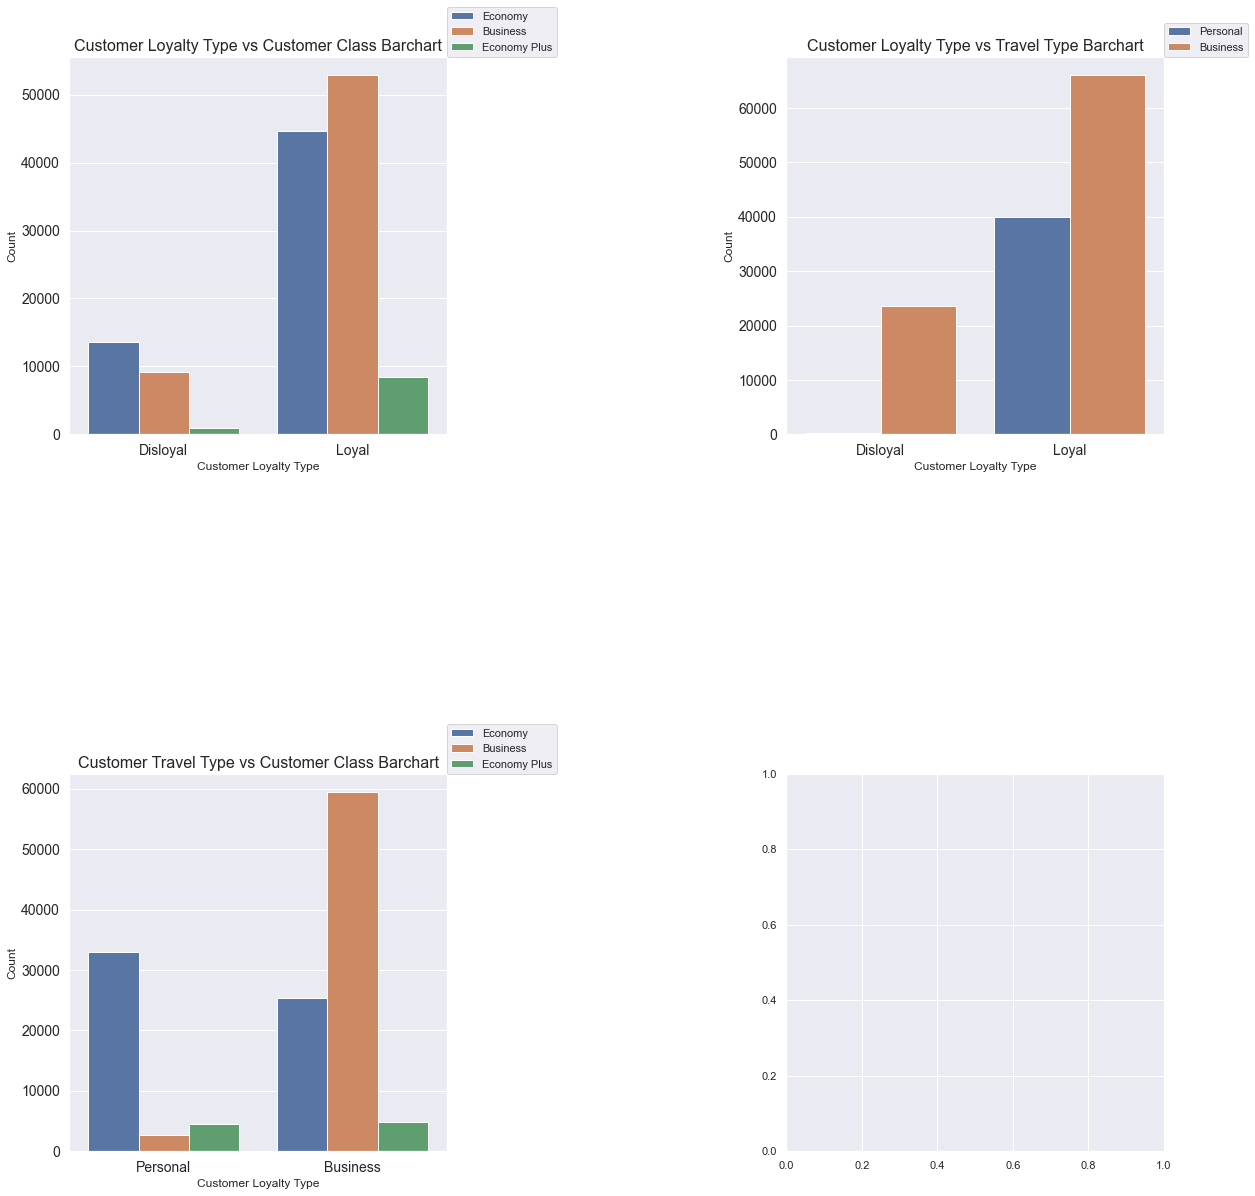

In [46]:
plt.subplots(2, 2, figsize = (19, 19))
sns.set(style="darkgrid")

plt.subplot(2,2,1)
sns.countplot(data = df, x = 'customer_loyalty_type', hue = 'customer_class_type')
plt.title('Customer Loyalty Type vs Customer Class Barchart', fontsize=16)
plt.xlabel('Customer Loyalty Type', fontsize=12)   
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = (1, 1))


plt.subplot(2,2,2)
sns.countplot(data = df, x = 'customer_loyalty_type', hue = 'customer_travel_type')
plt.title('Customer Loyalty Type vs Travel Type Barchart', fontsize=16)
plt.xlabel('Customer Loyalty Type', fontsize=12)   
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = (1, 1))


plt.subplot(2,2,3)
sns.countplot(data = df, x = 'customer_travel_type', hue = 'customer_class_type')
plt.title('Customer Travel Type vs Customer Class Barchart', fontsize=16)
plt.xlabel('Customer Loyalty Type', fontsize=12)   
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = (1, 1))


plt.subplot(2,2,4)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.9)
plt.show()

1. Economy plus leads to relatively more loyal customers (which we know from the prior section likely leads to more satisfied customers). Out of the three classes, it offers the best ratio of satisfied vs dissatisfied passengers. Therefore, the airline could expand the economy plus service to additional routes frequently taken by their busuiness travellers.


2. Interestingly, all business travellers are loyal. This shows the airlines' focus on business travellers.


3. As expected, almost all business class seats are taken up by business travellers. However, 40% of economy seats are still taken up by business travellers. We know the disparity between economy and business class satisfaction is significant. So this suggests that the business class is relative to other airlines, very strong. 

## SECTION 3

## Changing Categorical Columns To Binary

Building on from section 2, I will:
- firstly change all categorical columns to binary columns (this is required for the next step) and drop all non numeric value columns
- use a seaborn heatmap to identify multicolinearity
- add to my insights from section 2 regarding which features are likely to be important for ML models

Here are the cateogorical columns as outlines from the updated data dictionary:

Categorical Columns:
- `satisfaction_target` --> This is our target feature. It is whether or not a customer was satisfied
- `customer_gender` --> This shows whether or not the customer was male or female
- `customer_travel_type` --> This shows whether or not the customer travelled for business or personal travel
- `customer_class_type` --> This is the type of class the customer flew in (Eco, Eco Plus, Business)
- `customer_loyalty_type` --> This is whether or not the customer was loyal or disloyal

These are the columns we need to make binary. This is because machine learning models require numbers. They don't work with text. In this situation, each option can be given a column of it's own which is binary (1 or 0). One column will be removed to avoid multicollinearity. As discussed previosuly, this reduces the performance of a model.

In [131]:
# Below I am using pd.get_dummies to change the specified categorical columns to binary columns
gender_dummies = pd.get_dummies(df.satisfaction_target,  prefix = 'satisfaction_target').iloc[:,1:]
df = pd.concat([df, gender_dummies], axis=1)

gender_dummies = pd.get_dummies(df.customer_gender,  prefix = 'customer_gender').iloc[:,1:]
df = pd.concat([df, gender_dummies], axis=1)

gender_dummies = pd.get_dummies(df.customer_loyalty_type,  prefix = 'customer_loyalty_type').iloc[:,1:]
df = pd.concat([df, gender_dummies], axis=1)

gender_dummies = pd.get_dummies(df.customer_travel_type,  prefix = 'customer_travel_type').iloc[:,1:]
df = pd.concat([df, gender_dummies], axis=1)

gender_dummies = pd.get_dummies(df.customer_class_type,  prefix = 'customer_class_type').iloc[:,1:]
df = pd.concat([df, gender_dummies], axis=1)

In [132]:
# Below I am sanity checking that the new binary columns have been added
df.head(2)

,satisfaction_target,customer_gender,customer_loyalty_type,customer_age,customer_travel_type,customer_class_type,flight_distance,flight_wifi_satisfaction_rating,departure/arrival_time_satisfaction_rating,online_booking_satisfaction_rating,...,inflight_service_satisfaction_rating,cleanliness_satisfaction_rating,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction_target_Satisfied,customer_gender_Male,customer_loyalty_type_Loyal,customer_travel_type_Personal,customer_class_type_Economy,customer_class_type_Economy Plus
0,Satisfied,Male,Disloyal,56,Personal,Economy,369,0,2,0,...,4,3,0,0.0,1,1,0,1,1,0
1,Satisfied,Male,Disloyal,49,Personal,Economy,2486,0,2,1,...,3,2,0,0.0,1,1,0,1,1,0


In [133]:
# Below I am dropping the non binary text categoruical columns
df = df.drop('satisfaction_target', axis=1)
df= df.drop('customer_gender', axis=1)
df = df.drop('customer_loyalty_type', axis=1)
df = df.drop('customer_travel_type', axis=1)
df= df.drop('customer_class_type', axis=1)

In [134]:
#below I am confirming that the text categorical columns have been dropped
df.head(2)

,customer_age,flight_distance,flight_wifi_satisfaction_rating,departure/arrival_time_satisfaction_rating,online_booking_satisfaction_rating,gate_location_satisfaction_rating,food/drink_satisfaction_rating,online_boarding_satisfaction_rating,seat_comfort_satisfaction_rating,inflight_entertainment_satisfaction_rating,...,inflight_service_satisfaction_rating,cleanliness_satisfaction_rating,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction_target_Satisfied,customer_gender_Male,customer_loyalty_type_Loyal,customer_travel_type_Personal,customer_class_type_Economy,customer_class_type_Economy Plus
0,56,369,0,2,0,4,3,0,3,3,...,4,3,0,0.0,1,1,0,1,1,0
1,49,2486,0,2,1,4,2,1,3,2,...,3,2,0,0.0,1,1,0,1,1,0


***

## DataFrame Heatmap

The reason I converted categorical columns to binary ones is so we can correctly use a heatmap.

The aim is to identify the correlation between each column to each other column, especially to our target column. 

I'm doing this to
- Identify any columns which suffer from multicollinearity 
- Add to my insights from section 2
- [source for some of the code](https://stackoverflow.com/questions/57414771/how-to-plot-only-the-lower-triangle-of-a-seaborn-heatmap)

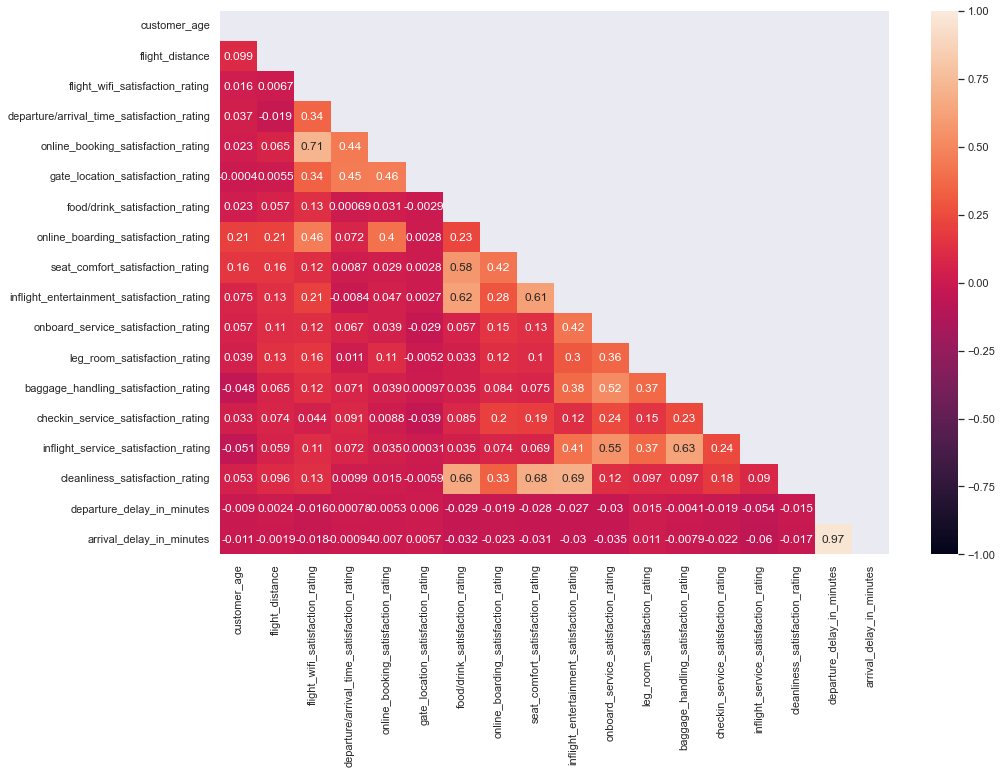

In [73]:
# Below I am creating a heatmap of each column and to what extent it relates to each other column

# Firstly I am setting the figure size
plt.figure(figsize = (15, 10))

# Next I set the .corr function of the dataframe equal to 'corr' to make the remaining lines of codes easier to write
corr= df.corr()

# Below I am getting the upper triangle of the heatmap
matrix = np.triu(corr)

# Below I am plotting the heatmap based on the dataframe 'df'
sns.heatmap(df.corr().dropna(how = 'all').dropna(axis=1, how='all'), 
                    vmin=-1, vmax = 1, annot = True, mask=matrix)

plt.show()

I will create a dataframe to show the heatmap and the insights from section 2 in more detail. It will be sorted from the features that most to least correlated.

#### Data Description df2

Categorical Columns:
- `df_column` --> This is each column from the original dataframe 'df'
- `SNS Heatmap Correlation To Target` --> This is taken directly from the SNS heatmap above and is the correlation rating
- `Predicted Feature Importance From Analysis` --> This is on a scale of 0 - 2. From my analysis in section 2, I predicted which features I thought would be valuable to ML models. 
    - 0 is "not at all"
    - 1 is 'slightly"
    - 2 is 'yes"

In [136]:
# Below I am creating a dataframe to more easily summarise my conclusions/findings
data = {'df_column':  ['online_boarding_satisfaction_rating', 'customer_travel_type_Personal', 'customer_class_type_Economy','inflight_entertainment_satisfaction_rating','seat_comfort_satisfaction_rating','onboard_service_satisfaction_rating','leg_room_satisfaction_rating','cleanliness_satisfaction_rating','flight_distance','flight_wifi_satisfaction_rating','baggage_handling_satisfaction_rating','checkin_service_satisfaction_rating','inflight_service_satisfaction_rating','food/drink_satisfaction_rating','customer_loyalty_type_Loyal','online_booking_satisfaction_rating','customer_age','customer_class_type_Economy Plus', 'arrival_delay_in_minutes', 'departure/arrival_time_satisfaction_rating', 'departure_delay_in_minutes', 'customer_gender_Male', 'gate_location_satisfaction_rating'],
        'SNS Heatmap Correlation To Target': ['0.5', '-0.45', '-0.45', '0.5', '0.5', '0.32', '0.31', '0.31', '0.3', '0.28', '0.25', '0.24', '0.24', '0.21', '0.19', '0.17', '0.13', '-0.11', '-0.058', '-0.054', '-0.051', '0.011', '-0.0028',],
        'Predicted Feature Importance From Analysis': ['2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '1', '0', '0', '0', '0', '0', '0',],
        }

df2 = pd.DataFrame(data)

df2.head(23)

,df_column,SNS Heatmap Correlation To Target,Predicted Feature Importance From Analysis
0,online_boarding_satisfaction_rating,0.5,2
1,customer_travel_type_Personal,-0.45,1
2,customer_class_type_Economy,-0.45,2
3,inflight_entertainment_satisfaction_rating,0.5,2
4,seat_comfort_satisfaction_rating,0.5,2
5,onboard_service_satisfaction_rating,0.32,2
6,leg_room_satisfaction_rating,0.31,2
7,cleanliness_satisfaction_rating,0.31,2
8,flight_distance,0.3,2
9,flight_wifi_satisfaction_rating,0.28,2


There are several takeaways:

1: The highest correlation to the target figure was 0.5, so no column will be dropped due to multicollinearity to the target

2: There is a correlation between the analysis from my EDA when I predicted which features would likely be important to ML models and their respective correlation to the target.

3: I can conclude that from my analysis
 - The  5 most likely features to be important in ML models in predicting which customer will be satisfied or dissatisfied are:
     - Online boarding rating
     - Customer Travel Type Personal / Customer Travel Type Economy
     - Inflight entertainment rating
     - Seat comfort rating
     
 - The  5 least likely features to be important in ML models in predicting which customer will be satisfied or dissatisfied are:
     - Gate location rating
     - Customer Gender Male
     - Departure Delay (mins)
     - Departure/Arrival time rating
     - Arrival Delay (mins)

Whilst 'Arrival Delay (mins)' doesn't suffer from multicollinearity to the target variable, it does when compared to the 'Departure Delay (mins)' variable (it has a correlation score of 0.97). This makes logical sense but it means we can't include it in our ML models. In addition, we know from notebook 1 that there are null values in 'Arrival Delay (mins) ' so out of the two options this is why we are removing this one.

In [137]:
# Below I am dropping the 'arrival_delay_in_minutes' column
df = df.drop('arrival_delay_in_minutes', axis=1)

In [140]:
# Below I am exporting the dataframe 'df' to a .csv file in my data folder which is located within my capstone folder.
df.to_csv('../data/cleaned_airlines2.csv')

## End of notebook review

**Notebook Achievements**

In this notebook I:
- Conducted a Univariate Analysis leveraging visualisations
- Conducted a Multivariate Analysis leveraging visualisations
- Related my analysis to the business question
- Changed categorical columns to binary columns and dropped the original text categorical columns
- Leveraged a seaborn heatmap to identify multicollinearity
- Created a dataframe to easily show the summary of my predictions
- exported the final dataframe as a .csv file

***

**Next Steps**

Now that I have explored the dataset and set up the dataframe for machine learning models, I can build and run machine learning models on the data. By the end of this notebook, I **predicted** which features I __thought__ would be important to ML models. In the notetbook I will conclude which features **actually** are the most important.